In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
features = pd.read_csv('../Data/training_set_features.csv')

In [5]:
features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [18]:
((features.isnull().sum() / len(features)) * 100).sort_values()

respondent_id                   0.000000
sex                             0.000000
hhs_geo_region                  0.000000
census_msa                      0.000000
race                            0.000000
age_group                       0.000000
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_antiviral_meds       0.265848
behavioral_outside_home         0.307036
behavioral_large_gatherings     0.325757
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_touch_face           0.479275
behavioral_avoidance            0.778822
household_children              0.932340
household_adults                0.932340
opinion_h1n1_risk               1.452803
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
health_worker                   3.010447
child_under_6_mo

In [60]:
categorical_columns = [
    'sex',
    'hhs_geo_region',
    'census_msa',
    'race',
    'age_group',
    'behavioral_face_mask',
    'behavioral_wash_hands',
    'behavioral_antiviral_meds',
    'behavioral_outside_home',
    'behavioral_large_gatherings',
    'behavioral_touch_face',
    'behavioral_avoidance',
    'health_worker',
    'child_under_6_months',
    'chronic_med_condition',
    'education',
    'marital_status',
    'employment_status',
    'rent_or_own',
    'doctor_recc_h1n1',
    'doctor_recc_seasonal',
    'income_poverty'
]

numerical_columns = [
    'household_children',
    'household_adults',
    'h1n1_concern',
    'h1n1_knowledge',
    'opinion_h1n1_risk',
    'opinion_h1n1_vacc_effective',
    'opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective',
    'opinion_seas_risk',
    'opinion_seas_sick_from_vacc',
    
]

In [61]:
features[categorical_columns]

,sex,hhs_geo_region,census_msa,race,age_group,behavioral_face_mask,behavioral_wash_hands,behavioral_antiviral_meds,behavioral_outside_home,behavioral_large_gatherings,...,health_worker,child_under_6_months,chronic_med_condition,education,marital_status,employment_status,rent_or_own,doctor_recc_h1n1,doctor_recc_seasonal,income_poverty
0,Female,oxchjgsf,Non-MSA,White,55 - 64 Years,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,< 12 Years,Not Married,Not in Labor Force,Own,0.0,0.0,Below Poverty
1,Male,bhuqouqj,"MSA, Not Principle City",White,35 - 44 Years,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,12 Years,Not Married,Employed,Rent,0.0,0.0,Below Poverty
2,Male,qufhixun,"MSA, Not Principle City",White,18 - 34 Years,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,College Graduate,Not Married,Employed,Own,NaN,NaN,"<= $75,000, Above Poverty"
3,Female,lrircsnp,"MSA, Principle City",White,65+ Years,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,12 Years,Not Married,Not in Labor Force,Rent,0.0,1.0,Below Poverty
4,Female,qufhixun,"MSA, Not Principle City",White,45 - 54 Years,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Some College,Married,Employed,Own,0.0,0.0,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,Female,qufhixun,Non-MSA,White,65+ Years,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,Some College,Not Married,Not in Labor Force,Own,0.0,0.0,"<= $75,000, Above Poverty"
26703,Male,lzgpxyit,"MSA, Principle City",White,18 - 34 Years,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,College Graduate,Not Married,Employed,Rent,1.0,1.0,"<= $75,000, Above Poverty"
26704,Female,lzgpxyit,"MSA, Not Principle City",White,55 - 64 Years,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,Some College,Not Married,NaN,Own,0.0,0.0,NaN
26705,Female,lrircsnp,Non-MSA,Hispanic,18 - 34 Years,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,Some College,Married,Employed,Rent,0.0,0.0,"<= $75,000, Above Poverty"


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

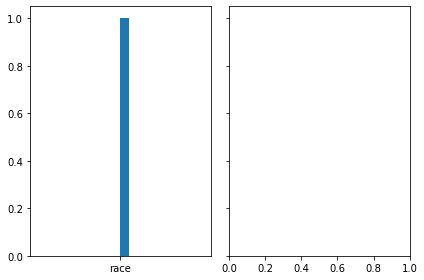

In [64]:
n_bins = 20

fig, axs = plt.subplots(1,2, sharey=True, tight_layout=True)

axs[0].hist('race', bins=n_bins)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

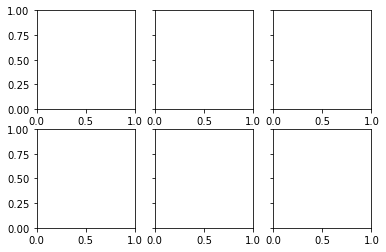

In [91]:
fig, axes = plt.subplots(2,3, sharey=True)
sub_num = 0
for num_column in numerical_columns:
    ax = sns.distplot(features[num_column], kde=True, bins=4, ax=axes[sub_num])
    sub_num += 1

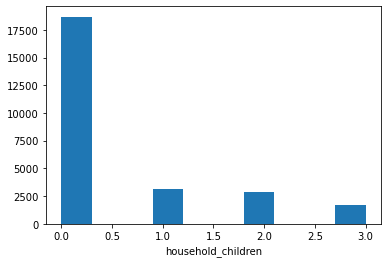

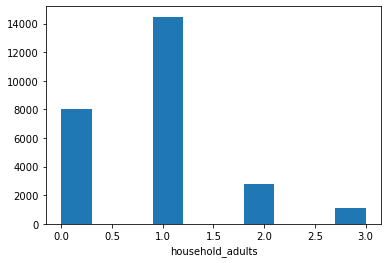

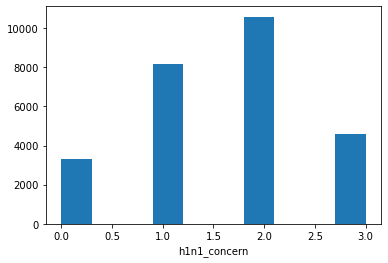

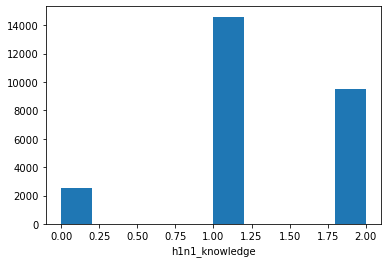

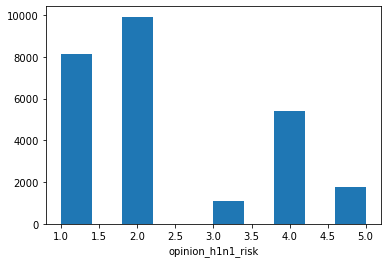

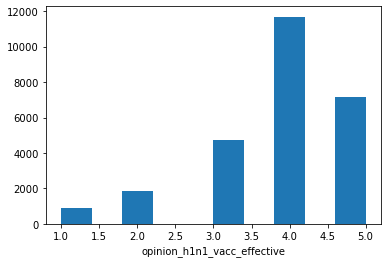

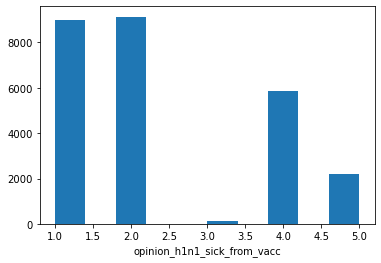

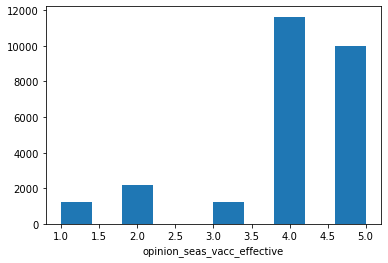

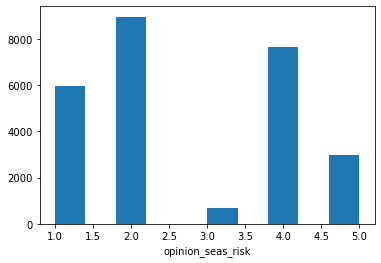

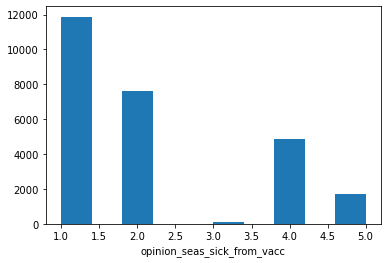

In [94]:
for x in numerical_columns:
    plt.figure()
    plt.hist(features[x])
    plt.xlabel(x)